In [1]:
from static_plot import static_track_temp, static_track_conditions
from driver_comparisons import  main, plot_driver_speed_change, get_driver_lap_comparison,fastest_laptimes, fastest_lap_comparison, driver_gear_changes
from F1_aws_plot import get_driver_aws_data, main

In [2]:
from matplotlib import pyplot
import datetime as dt
import matplotlib.animation as animation
from random import randint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np

import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from timple.timedelta import strftimedelta

In [3]:
silverstone_p1 = main(2022, "British", "Practice 1")

core           INFO 	Loading data for British Grand Prix - Practice 1 [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [4]:
silverstone_p1_nonulls = silverstone_p1.laps
silverstone_p1_nonulls

Time DriverNumber                LapTime  LapNumber  \
0  0 days 00:33:15.530000            1                    NaT          1   
1  0 days 01:12:47.901000            1                    NaT          2   
2  0 days 01:14:36.962000            1                    NaT          3   
3  0 days 00:17:56.231000           55                    NaT          1   
4  0 days 00:30:34.499000           55                    NaT          2   
..                    ...          ...                    ...        ...   
76 0 days 00:44:27.259000           77 0 days 00:02:12.490000          5   
77 0 days 01:09:01.952000           77                    NaT          6   
78 0 days 01:10:44.201000           77 0 days 00:01:42.249000          7   
79 0 days 01:12:37.730000           77 0 days 00:01:53.529000          8   
80 0 days 01:15:09.513000           77                    NaT          9   

    Stint             PitOutTime              PitInTime  \
0       2 0 days 00:31:09.188000 0 days 00:33:10.057000   
1       2 0 days 01:10:52.244000                    NaT   
2       2                    NaT 0 days 01:14:36.962000   
3       2 0 days 00:15:52.698000 0 days 00:17:50.003000   
4       2 0 days 00:28:42.140000                    NaT   
..    ...                    ...                    ...   
76      2                    NaT 0 days 00:44:21.095000   
77      2 0 days 01:06:51.718000                    NaT   
78      2                    NaT                    NaT   
79      3                    NaT 0 days 01:12:31.715000   
80      3 0 days 01:13:03.017000 0 days 01:15:09.513000   

              Sector1Time            Sector2Time            Sector3Time  ...  \
0                     NaT 0 days 00:00:54.673000 0 days 00:00:37.405000  ...   
1                     NaT 0 days 00:00:51.806000 0 days 00:00:29.790000  ...   
2  0 days 00:00:29.576000                    NaT                    NaT  ...   
3                     NaT 0 days 00:00:53.837000 0 days 00:00:34.214000  ...   
4                     NaT 0 days 00:00:47.632000 0 days 00:00:30.813000  ...   
..                    ...                    ...                    ...  ...   
76 0 days 00:00:41.178000 0 days 00:00:56.365000 0 days 00:00:34.947000  ...   
77                    NaT 0 days 00:00:52.425000 0 days 00:00:36.186000  ...   
78 0 days 00:00:31.976000 0 days 00:00:42.285000 0 days 00:00:27.988000  ...   
79 0 days 00:00:38.681000 0 days 00:00:46.368000 0 days 00:00:28.480000  ...   
80 0 days 00:00:58.418000                    NaT                    NaT  ...   

   IsPersonalBest      Compound TyreLife  FreshTyre           LapStartTime  \
0           False  INTERMEDIATE      NaN       True 0 days 00:31:09.188000   
1           False          SOFT      2.0       True 0 days 00:33:15.530000   
2           False          SOFT      3.0       True 0 days 01:12:47.901000   
3           False  INTERMEDIATE      1.0       True 0 days 00:15:52.698000   
4           False  INTERMEDIATE      3.0      False 0 days 00:17:56.231000   
..            ...           ...      ...        ...                    ...   
76          False  INTERMEDIATE      1.0       True 0 days 00:42:14.769000   
77          False  INTERMEDIATE      7.0      False 0 days 00:44:27.259000   
78           True  INTERMEDIATE      8.0      False 0 days 01:09:01.952000   
79          False  INTERMEDIATE      6.0      False 0 days 01:10:44.201000   
80          False          SOFT      2.0       True 0 days 01:12:37.730000   

               Team  Driver TrackStatus IsAccurate            LapStartDate  
0   Red Bull Racing     VER           1      False 2022-07-01 12:16:09.196  
1   Red Bull Racing     VER           1      False 2022-07-01 12:18:15.538  
2   Red Bull Racing     VER           2      False 2022-07-01 12:57:47.909  
3           Ferrari     SAI           1      False 2022-07-01 12:00:52.706  
4           Ferrari     SAI           1      False 2022-07-01 12:02:56.239  
..              ...     ...         ...

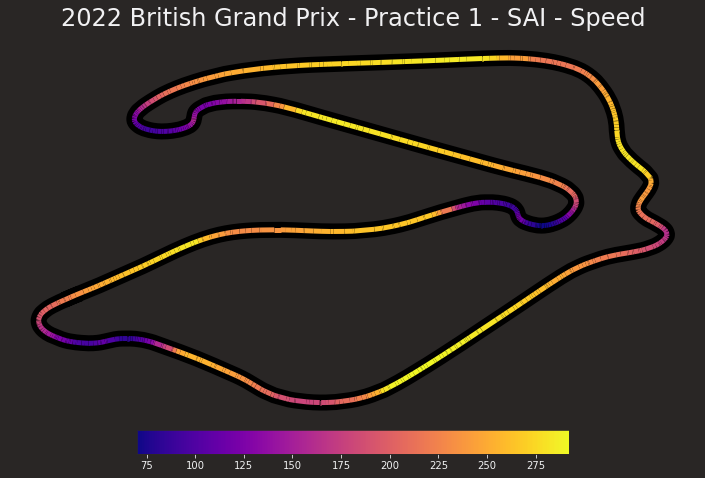

In [5]:
plot_driver_speed_change("SAI",silverstone_p1)

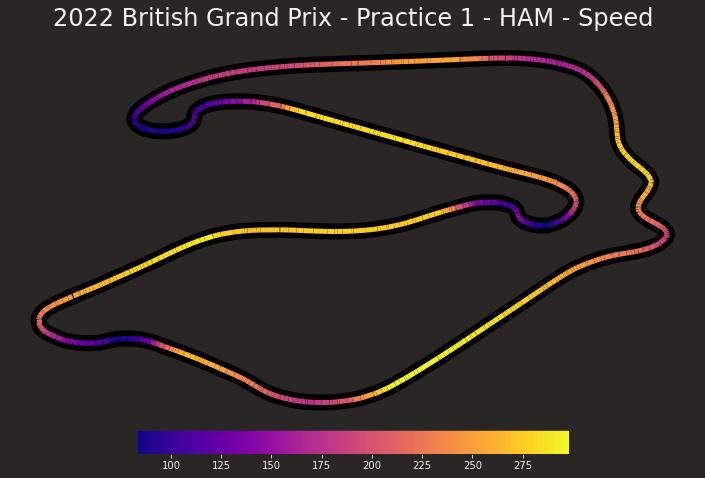

In [6]:
plot_driver_speed_change("HAM",silverstone_p1)

In [7]:
silverstone_p1.weather_data['TrackTemp']




0     26.8
1     26.7
2     26.8
3     26.9
4     26.6
      ... 
72    26.4
73    25.2
74    24.8
75    24.6
76    24.4
Name: TrackTemp, Length: 77, dtype: float64

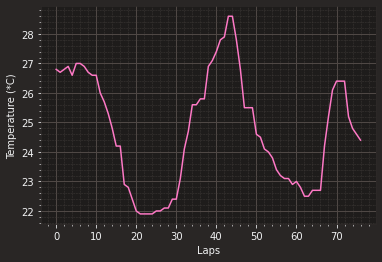

In [8]:
static_track_temp(silverstone_p1)

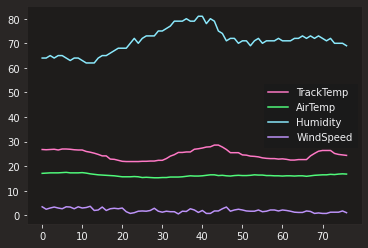

In [9]:
static_track_conditions(silverstone_p1)

In [10]:
'''# animated_line_plot.py

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()'''


'# animated_line_plot.py\n\n# create empty lists for the x and y data\nx = []\ny = []\n\n# create the figure and axes objects\nfig, ax = plt.subplots()\n\n# function that draws each frame of the animation\ndef animate(i):\n    pt = randint(1,9) # grab a random integer to be the next y-value in the animation\n    x.append(i)\n    y.append(pt)\n\n    ax.clear()\n    ax.plot(x, y)\n    ax.set_xlim([0,20])\n    ax.set_ylim([0,10])\n# run the animation\nani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)\n\nplt.show()'

In [11]:
silverstone_weather_df = silverstone_p1.weather_data
silverstone_weather_df


Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:40.904000     17.1      64.0     998.4     False       26.8   
1  0 days 00:01:40.900000     17.2      64.0     998.4     False       26.7   
2  0 days 00:02:40.899000     17.3      65.0     998.4     False       26.8   
3  0 days 00:03:40.907000     17.3      64.0     998.2     False       26.9   
4  0 days 00:04:40.904000     17.3      65.0     998.4     False       26.6   
..                    ...      ...       ...       ...       ...        ...   
72 0 days 01:12:41.057000     16.7      72.0     998.4     False       26.4   
73 0 days 01:13:41.063000     16.6      70.0     998.4     False       25.2   
74 0 days 01:14:41.056000     16.8      70.0     998.4      True       24.8   
75 0 days 01:15:41.058000     16.9      70.0     998.4      True       24.6   
76 0 days 01:16:41.056000     16.8      69.0     998.4      True       24.4   

    WindDirection  WindSpeed  
0             236        3.5  
1             240        2.5  
2             239        3.0  
3             230        3.4  
4             242        3.0  
..            ...        ...  
72            240        1.3  
73            221        1.3  
74            267        1.3  
75            263        1.8  
76            212        1.1  

[77 rows x 8 columns]

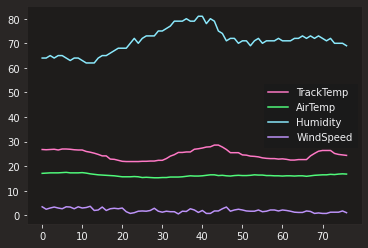

In [12]:
silverstone_tracktemp = silverstone_weather_df[['TrackTemp',"AirTemp","Humidity","WindSpeed"]]


silverstone_tracktemp.plot()
pyplot.show()

In [13]:
df_silverstone_p1= silverstone_p1.laps
df_silverstone_p1 = df_silverstone_p1[df_silverstone_p1["LapTime"].notna()]
df_silverstone_p1.sort_values(["LapTime"])


Time DriverNumber                LapTime  LapNumber  \
78 0 days 01:10:44.201000           77 0 days 00:01:42.249000          7   
22 0 days 01:13:46.254000           44 0 days 00:01:42.781000          9   
6  0 days 00:34:06.466000           55 0 days 00:01:42.967000          4   
75 0 days 00:42:14.769000           77 0 days 00:01:43.437000          4   
45 0 days 00:21:22.480000           16 0 days 00:01:43.801000          3   
12 0 days 00:43:49.426000           47 0 days 00:01:43.895000          2   
64 0 days 00:33:45.754000            4 0 days 00:01:44.337000          2   
44 0 days 00:19:38.679000           16 0 days 00:01:44.769000          2   
21 0 days 01:12:03.473000           44 0 days 00:01:44.798000          8   
73 0 days 00:38:20.828000           77 0 days 00:01:46.056000          2   
26 0 days 00:37:33.906000           24 0 days 00:01:46.171000          2   
16 0 days 00:43:30.365000           44 0 days 00:01:46.396000          3   
36 0 days 00:34:03.004000           20 0 days 00:01:48.161000          2   
37 0 days 00:35:51.788000           20 0 days 00:01:48.784000          3   
27 0 days 00:39:22.832000           24 0 days 00:01:48.926000          3   
5  0 days 00:32:23.499000           55        0 days 00:01:49          3   
18 0 days 01:05:58.531000           44 0 days 00:01:49.476000          5   
32 0 days 00:29:44.090000           22 0 days 00:01:49.972000          3   
39 0 days 00:29:54.749000           18 0 days 00:01:51.243000          2   
31 0 days 00:27:54.118000           22 0 days 00:01:51.373000          2   
79 0 days 01:12:37.730000           77 0 days 00:01:53.529000          8   
19 0 days 01:07:53.604000           44 0 days 00:01:55.073000          6   
68 0 days 00:30:18.760000            3 0 days 00:01:55.899000          2   
60 0 days 00:31:21.708000            5 0 days 00:01:56.216000          3   
40 0 days 00:31:51.484000           18 0 days 00:01:56.735000          3   
59 0 days 00:29:25.492000            5 0 days 00:01:59.168000          2   
46 0 days 00:23:24.222000           16 0 days 00:02:01.742000          4   
13 0 days 00:45:51.571000           47 0 days 00:02:02.145000          3   
74 0 days 00:40:31.332000           77 0 days 00:02:10.504000          3   
7  0 days 00:36:17.398000           55 0 days 00:02:10.932000          5   
76 0 days 00:44:27.259000           77 0 days 00:02:12.490000          5   
9  0 days 01:12:34.031000           55 0 days 00:02:20.930000          7   
20 0 days 01:10:18.675000           44 0 days 00:02:25.071000          7   
48 0 days 01:12:31.312000           16 0 days 00:02:28.939000          6   

    Stint             PitOutTime              PitInTime  \
78      2                    NaT                    NaT   
22      4                    NaT                    NaT   
6       2                    NaT                    NaT   
75      1                    NaT                    NaT   
45      1                    NaT                    NaT   
12      1                    NaT                    NaT   
64      2                    NaT 0 days 00:33:39.723000   
44      1                    NaT                    NaT   
21      4                    NaT                    NaT   
73      1                    NaT                    NaT   
26      1                    NaT                    NaT   
16      3                    NaT 0 days 00:43:24.314000   
36      1                    NaT                    NaT   
37      1                    NaT 0 days 00:35:44.838000   
27      2                    NaT 0 days 00:39:16.847000   
5       2                    NaT                    NaT   
18      3                    NaT                    NaT   
32      2                    NaT 0 days 00:29:37.499000   
39      1                    NaT                    NaT   
31      1                    NaT                    NaT   
79      3                    NaT 0 days 01:12:31.715000   
19      4                    NaT 0 days 01:07:47.602000   
68 

In [14]:
#df_silverstone_p1.columns

In [15]:
silverstone_p2 = main(2022, "British", "FP2")

core           INFO 	Loading data for British Grand Prix - Practice 2 [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [16]:
'''def sort_fastest_practice_time(session):
    df_silverstone_p= session.laps
    df_silverstone_p = df_silverstone_p[df_silverstone_p["LapTime"].notna()]
    df_silverstone_p = df_silverstone_p.sort_values(["LapTime"])
    return(df_silverstone_p)

sort_fastest_practice_time(silverstone_p2).head()'''

'def sort_fastest_practice_time(session):\n    df_silverstone_p= session.laps\n    df_silverstone_p = df_silverstone_p[df_silverstone_p["LapTime"].notna()]\n    df_silverstone_p = df_silverstone_p.sort_values(["LapTime"])\n    return(df_silverstone_p)\n\nsort_fastest_practice_time(silverstone_p2).head()'

['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


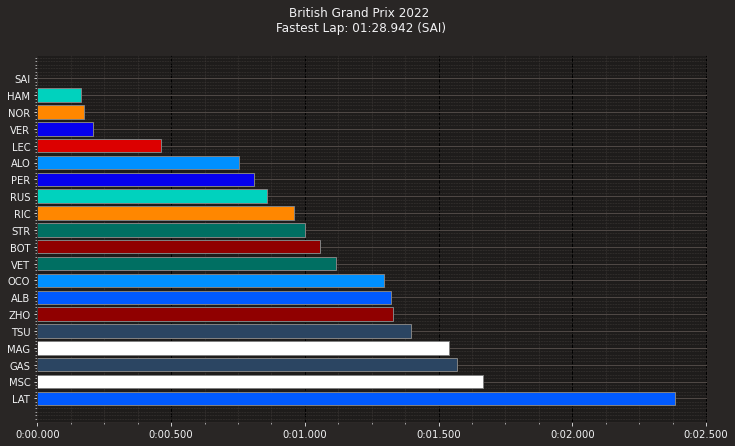

In [17]:
fastest_laptimes(silverstone_p2)

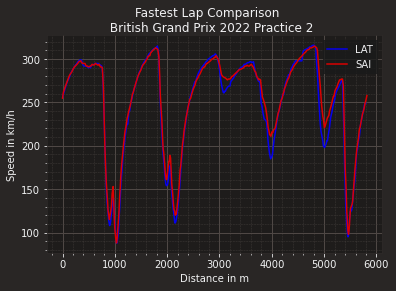

In [18]:
fastest_lap_comparison("LAT","SAI", silverstone_p2)

In [19]:
'''carlo_GP = silverstone_p2.laps.pick_driver('SAI')

carlo_GP = carlo_GP.sort_values(by=["LapTime"], ascending=True)
carlo_GP'''


'carlo_GP = silverstone_p2.laps.pick_driver(\'SAI\')\n\ncarlo_GP = carlo_GP.sort_values(by=["LapTime"], ascending=True)\ncarlo_GP'

In [20]:
silverstone_p2.weather_data

Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:41.431000     19.5      43.0     998.5     False       31.2   
1  0 days 00:01:41.418000     19.7      43.0     998.5     False       31.2   
2  0 days 00:02:41.430000     19.8      44.0     998.5     False       30.9   
3  0 days 00:03:41.428000     19.9      45.0     998.5     False       30.6   
4  0 days 00:04:41.429000     19.7      45.0     998.5     False       30.6   
..                    ...      ...       ...       ...       ...        ...   
76 0 days 01:16:41.680000     17.9      54.0     999.2     False       28.8   
77 0 days 01:17:41.680000     18.0      53.0     999.2     False       28.8   
78 0 days 01:18:41.683000     18.0      53.0     999.2     False       28.9   
79 0 days 01:19:41.681000     18.0      54.0     999.2     False       28.9   
80 0 days 01:20:41.697000     18.1      54.0     999.2     False       28.9   

    WindDirection  WindSpeed  
0             252        3.9  
1             250        3.2  
2             221        3.4  
3             244        3.2  
4             253        3.7  
..            ...        ...  
76            252        4.4  
77            259        4.3  
78            259        4.4  
79            264        3.0  
80            238        3.0  

[81 rows x 8 columns]

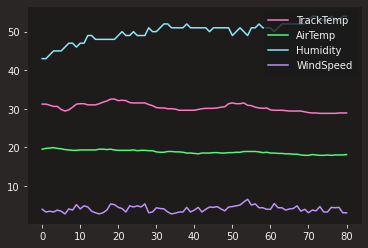

In [21]:
static_track_conditions(silverstone_p2)

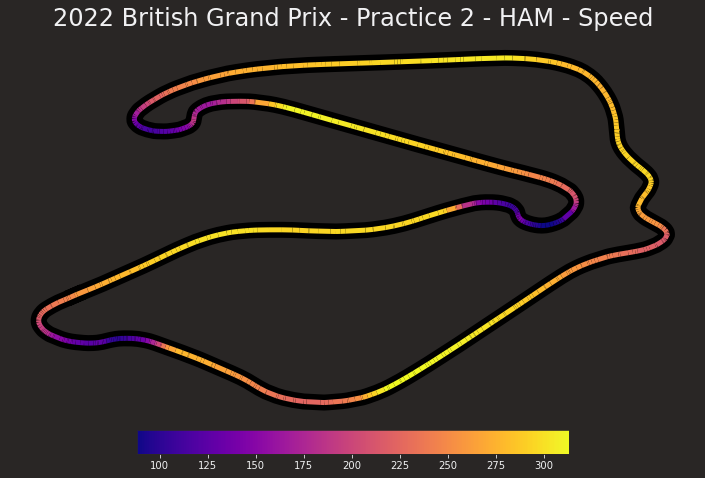

In [22]:
plot_driver_speed_change("HAM", silverstone_p2)

In [23]:
#get_driver_aws_data("SAI","HAM", 0000, 5800, silverstone_p2)

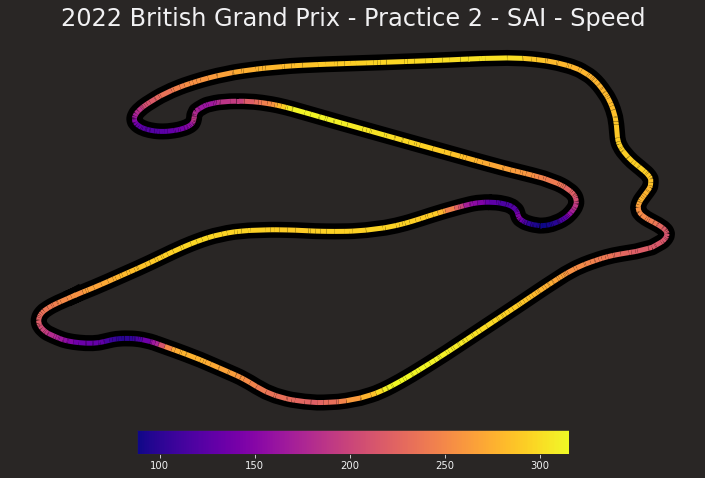

In [24]:
plot_driver_speed_change("SAI", silverstone_p2)

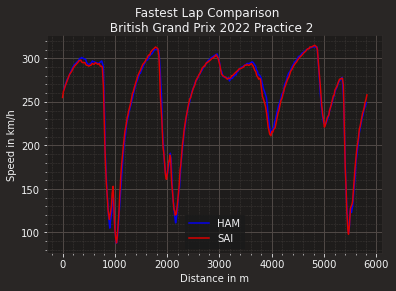

In [25]:
fastest_lap_comparison("HAM","SAI",silverstone_p2)

Same Team Color


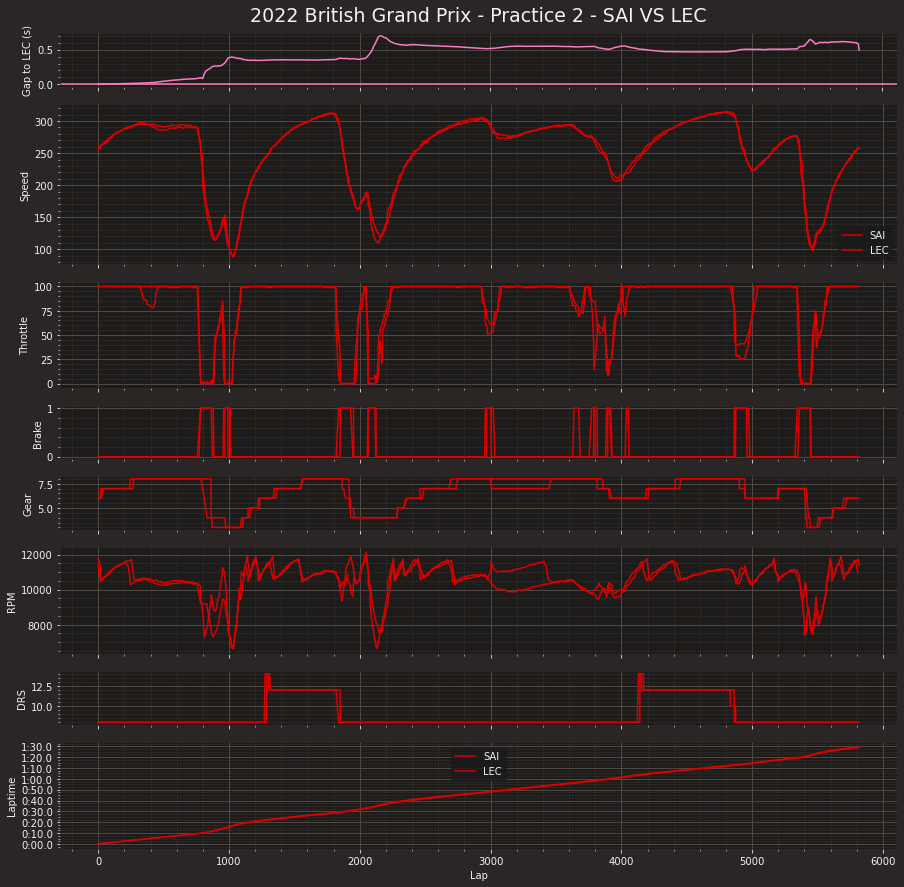

In [26]:
get_driver_lap_comparison("SAI","LEC", silverstone_p2)

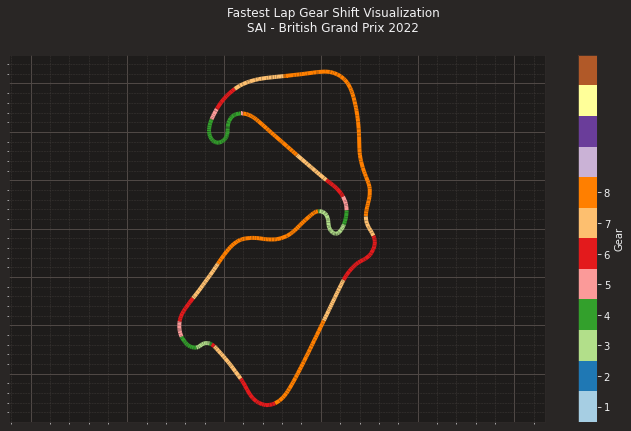

In [27]:
driver_gear_changes("SAI", silverstone_p2)

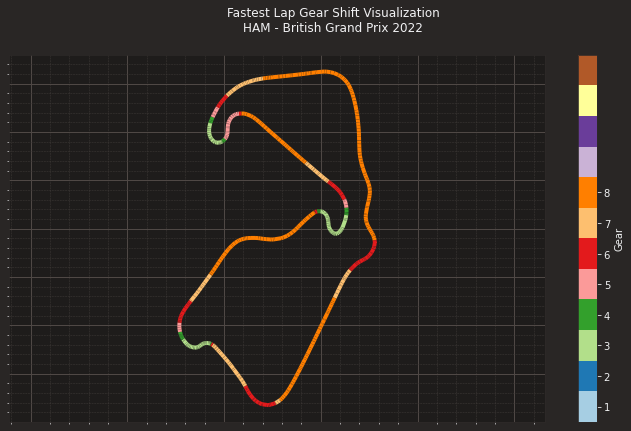

In [28]:
driver_gear_changes("HAM",silverstone_p2)

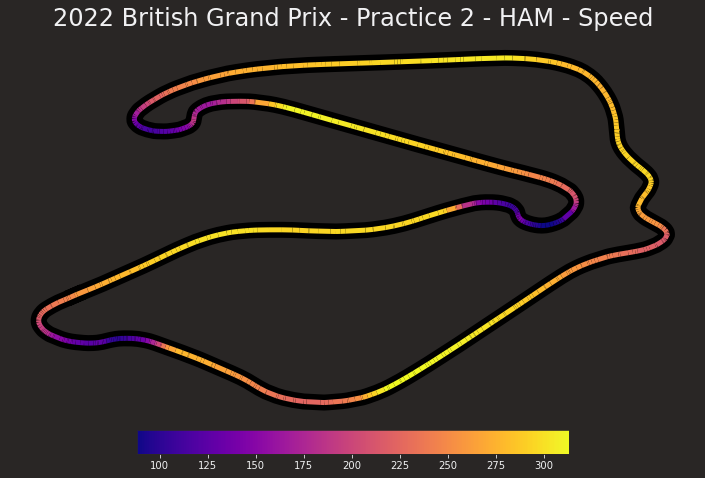

In [29]:
plot_driver_speed_change("HAM", silverstone_p2)

In [30]:
'''carlo_GP = carlo_GP['LapTime']

carlo_GP.plot()
pyplot.show()'''

"carlo_GP = carlo_GP['LapTime']\n\ncarlo_GP.plot()\npyplot.show()"

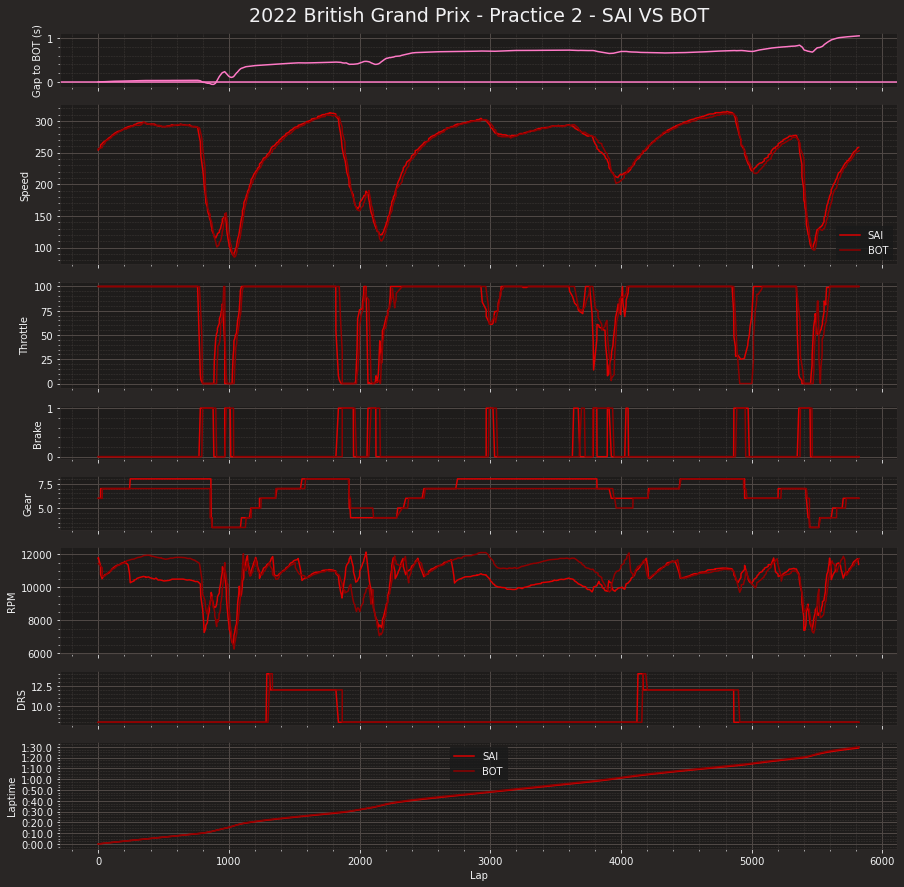

In [31]:
get_driver_lap_comparison("SAI","BOT", silverstone_p2)

In [32]:
silverstone_p2.laps

Time DriverNumber                LapTime  LapNumber  \
0   0 days 00:17:59.768000            1                    NaT          1   
1   0 days 00:19:31.206000            1 0 days 00:01:31.438000          2   
2   0 days 00:21:48.612000            1 0 days 00:02:17.406000          3   
3   0 days 00:23:49.500000            1 0 days 00:02:00.888000          4   
4   0 days 00:25:19.988000            1 0 days 00:01:30.488000          5   
..                     ...          ...                    ...        ...   
466 0 days 01:12:52.195000           77 0 days 00:01:34.799000         25   
467 0 days 01:14:27.352000           77 0 days 00:01:35.157000         26   
468 0 days 01:16:02.611000           77 0 days 00:01:35.259000         27   
469 0 days 01:18:07.742000           77 0 days 00:02:05.131000         28   
470 0 days 01:20:14.141000           77 0 days 00:02:06.399000         29   

     Stint             PitOutTime              PitInTime  \
0        1 0 days 00:15:59.232000                    NaT   
1        1                    NaT                    NaT   
2        1                    NaT                    NaT   
3        1                    NaT                    NaT   
4        1                    NaT                    NaT   
..     ...                    ...                    ...   
466      5                    NaT                    NaT   
467      5                    NaT                    NaT   
468      5                    NaT                    NaT   
469      5                    NaT                    NaT   
470      5                    NaT 0 days 01:20:08.131000   

               Sector1Time            Sector2Time            Sector3Time  ...  \
0                      NaT 0 days 00:00:42.077000 0 days 00:00:49.528000  ...   
1   0 days 00:00:29.099000 0 days 00:00:37.321000 0 days 00:00:25.018000  ...   
2   0 days 00:00:41.436000 0 days 00:00:59.595000 0 days 00:00:36.375000  ...   
3   0 days 00:00:36.274000 0 days 00:00:51.589000 0 days 00:00:33.025000  ...   
4   0 days 00:00:29.079000 0 days 00:00:36.621000 0 days 00:00:24.788000  ...   
..                     ...                    ...                    ...  ...   
466 0 days 00:00:30.274000 0 days 00:00:38.356000 0 days 00:00:26.169000  ...   
467 0 days 00:00:30.266000 0 days 00:00:38.484000 0 days 00:00:26.407000  ...   
468 0 days 00:00:30.481000 0 days 00:00:38.566000 0 days 00:00:26.212000  ...   
469 0 days 00:00:35.803000 0 days 00:00:48.506000 0 days 00:00:40.822000  ...   
470 0 days 00:00:53.475000 0 days 00:00:44.075000 0 days 00:00:28.849000  ...   

    IsPersonalBest Compound TyreLife  FreshTyre           LapStartTime  \
0            False   MEDIUM      1.0       True 0 days 00:15:59.232000   
1            False   MEDIUM      2.0       True 0 days 00:17:59.768000   
2            False   MEDIUM      3.0       True 0 days 00:19:31.206000   
3            False   MEDIUM      4.0       True 0 days 00:21:48.612000   
4            False   MEDIUM      5.0       True 0 days 00:23:49.500000   
..             ...      ...      ...        ...                    ...   
466          False     HARD     15.0      False 0 days 01:11:17.396000   
467          False     HARD     16.0      False 0 days 01:12:52.195000   
468          False     HARD     17.0      False 0 days 01:14:27.352000   
469          False     HARD     18.0      False 0 days 01:16:02.611000   
470          False     HARD     19.0      False 0 days 01:18:07.742000   

                Team  Driver  TrackStatus IsAccurate            LapStartDate  
0    Red Bull Racing     VER            1      False 2022-07-01 15:00:59.243  
1    Red Bull Racing     VER            1       True 2022-07-01 15:02:59.779  
2    Red Bull Racing     VER            1       True 2022-07-01 15:04:31.217  
3    Red Bull Racing     VER            1       True 2022-07-01 15:06:48.623  
4    Red Bull Racing     VER            1       True 2022-07-01 15:08:49.511  
..               ...     ...          ..

In [33]:
'''drivers = pd.unique(silverstone_p2.laps['Driver'])
print(drivers)

list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = silverstone_p2.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    # plot is nicer to look at and more easily understandable if we just plot the time differences.
    #  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)'''

"drivers = pd.unique(silverstone_p2.laps['Driver'])\nprint(drivers)\n\nlist_fastest_laps = list()\n\nfor drv in drivers:\n    drvs_fastest_lap = silverstone_p2.laps.pick_driver(drv).pick_fastest()\n    list_fastest_laps.append(drvs_fastest_lap)\nfastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)\n\n    # plot is nicer to look at and more easily understandable if we just plot the time differences.\n    #  Therefore we subtract the fastest lap time from all other lap times.\npole_lap = fastest_laps.pick_fastest()\nfastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']\n\nteam_colors = list()\nfor index, lap in fastest_laps.iterlaps():\n    color = ff1.plotting.team_color(lap['Team'])\n    team_colors.append(color)"

In [34]:
tyrelife = pd.unique(silverstone_p2.laps['TyreLife'])
for d in tyrelife:
    print(d)


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
nan
13.0
12.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0


In [35]:
tyrelife

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan, 13.,
       12., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

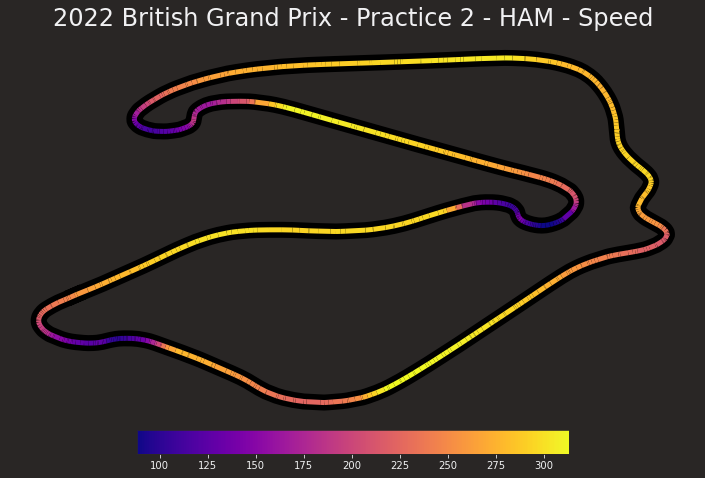

In [36]:
plot_driver_speed_change("HAM", silverstone_p2)

### Qualifying Data Analysis below:



In [37]:
quali_silverstone = main(2022, "British", "Q")

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


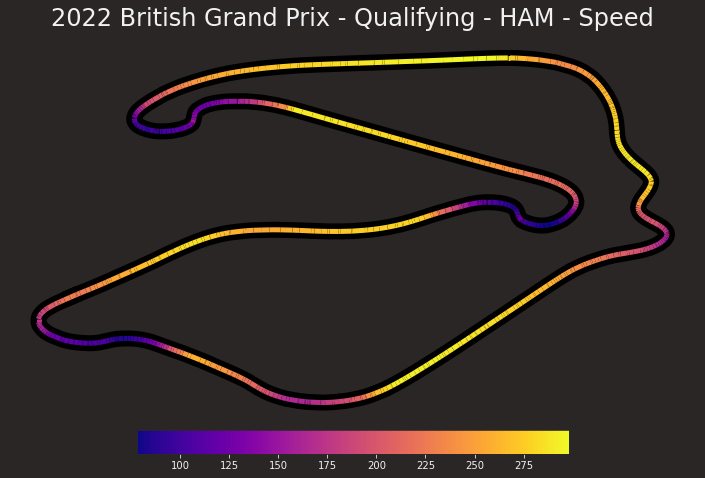

In [38]:
plot_driver_speed_change("HAM", quali_silverstone)

['SAI' 'VER' 'LEC' 'PER' 'HAM' 'NOR' 'ALO' 'RUS' 'ZHO' 'LAT' 'GAS' 'BOT'
 'TSU' 'RIC' 'OCO' 'ALB' 'MAG' 'VET' 'MSC' 'STR']


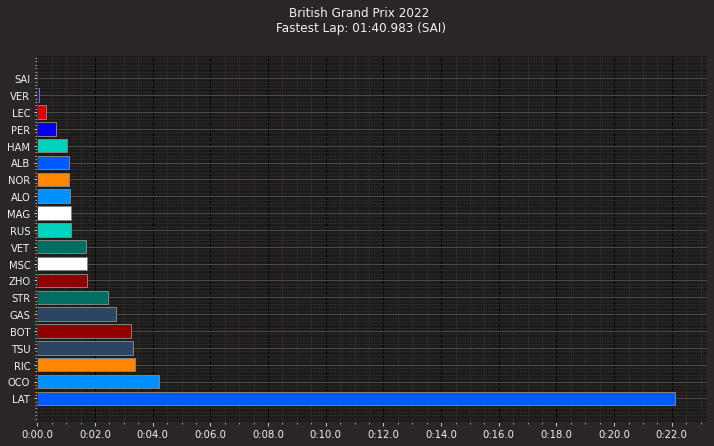

In [39]:
fastest_laptimes(quali_silverstone)

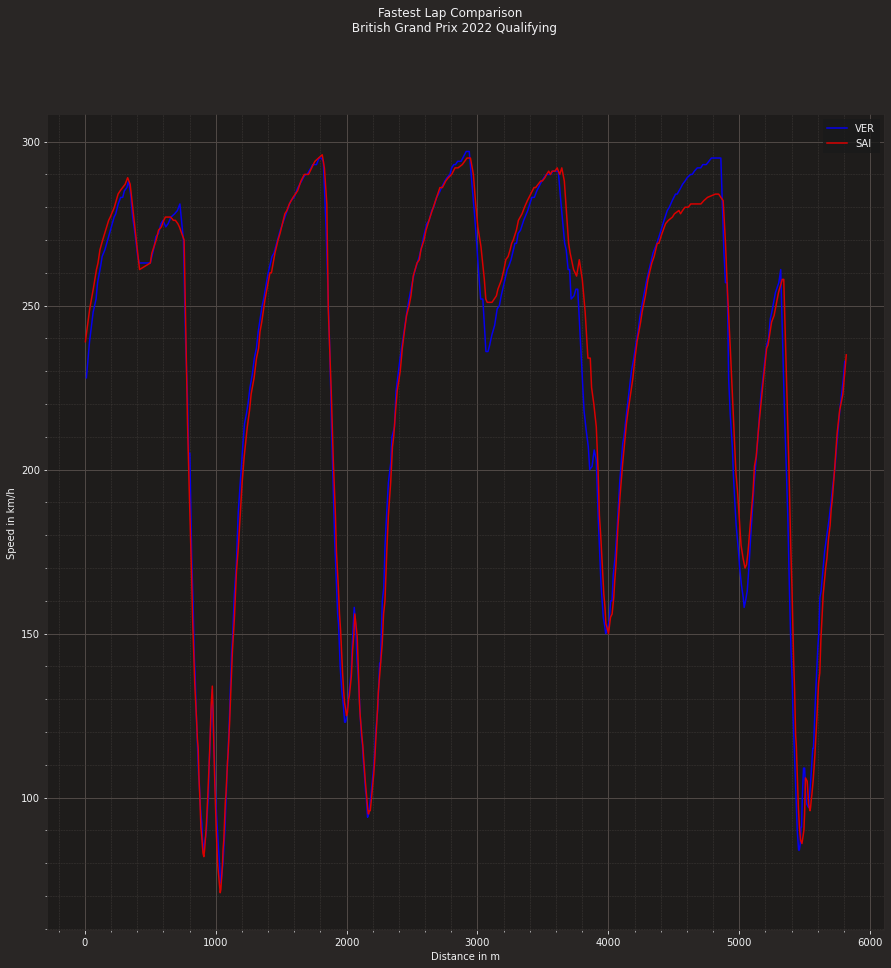

None


In [40]:
print(fastest_lap_comparison("VER","SAI", quali_silverstone))
#print(get_driver_aws_data("SAI","VER",0,5800, quali_silverstone))

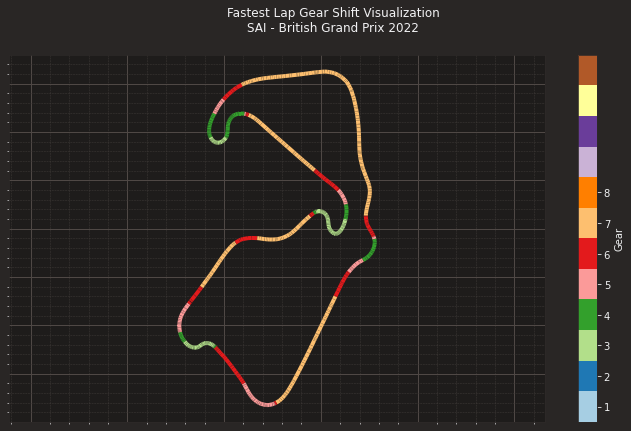

In [41]:
driver_gear_changes("SAI", quali_silverstone)

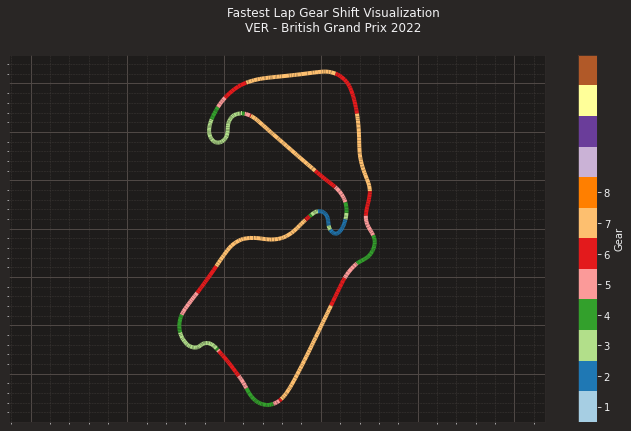

In [42]:
driver_gear_changes("VER",quali_silverstone)

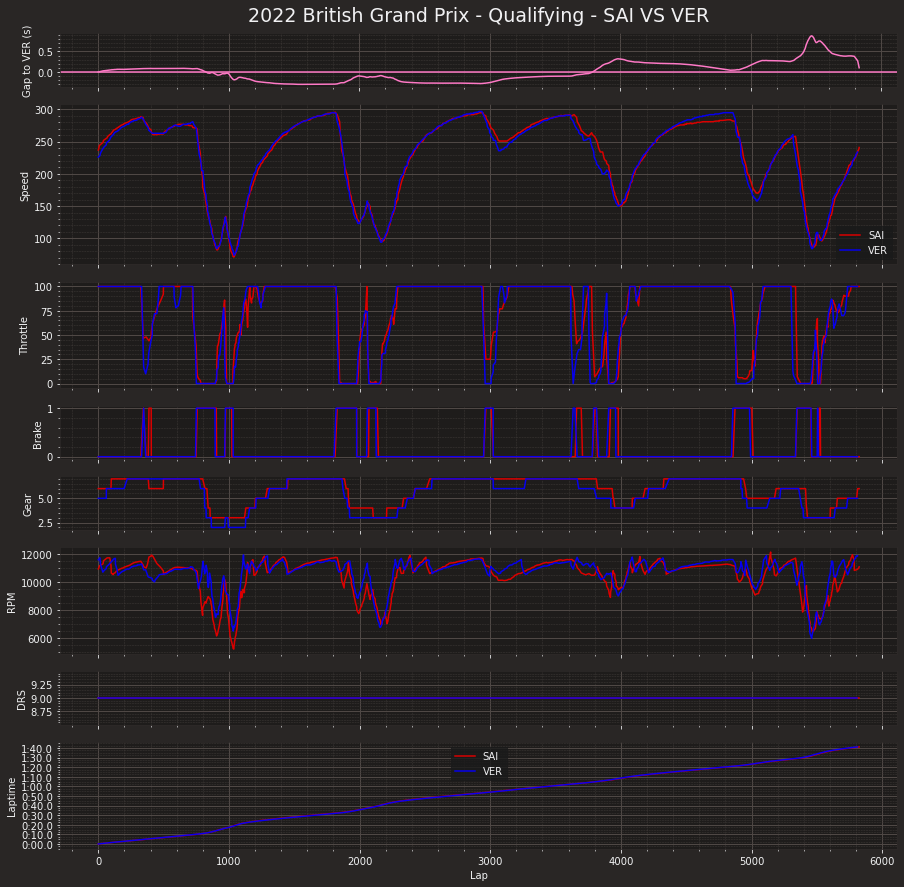

In [43]:
get_driver_lap_comparison("SAI","VER", quali_silverstone)

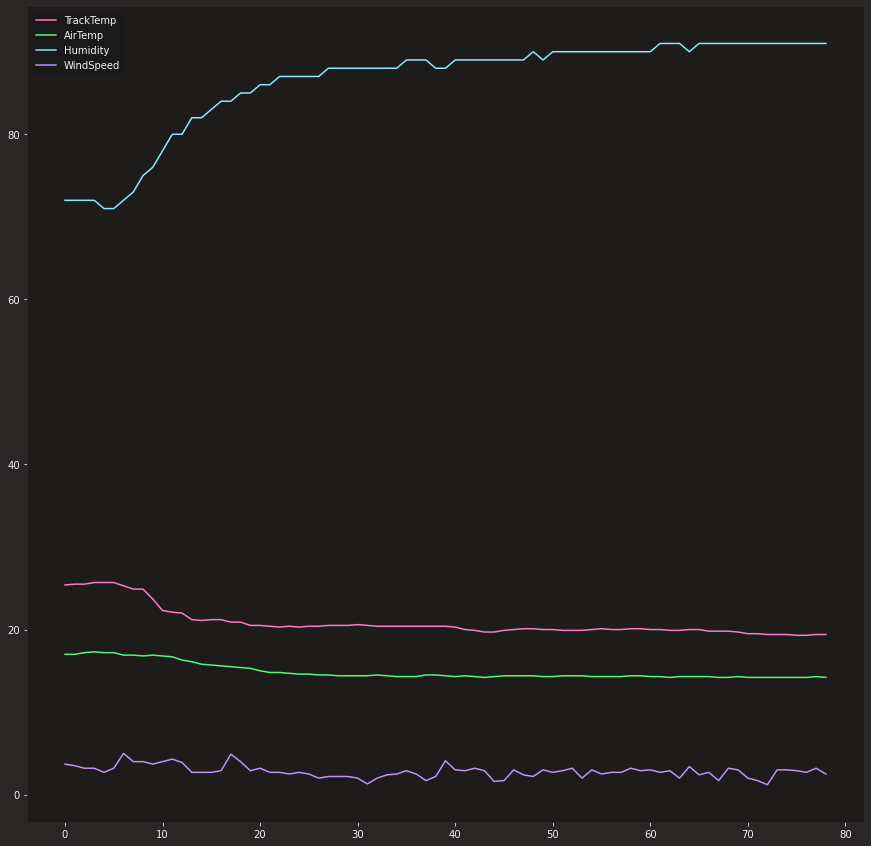

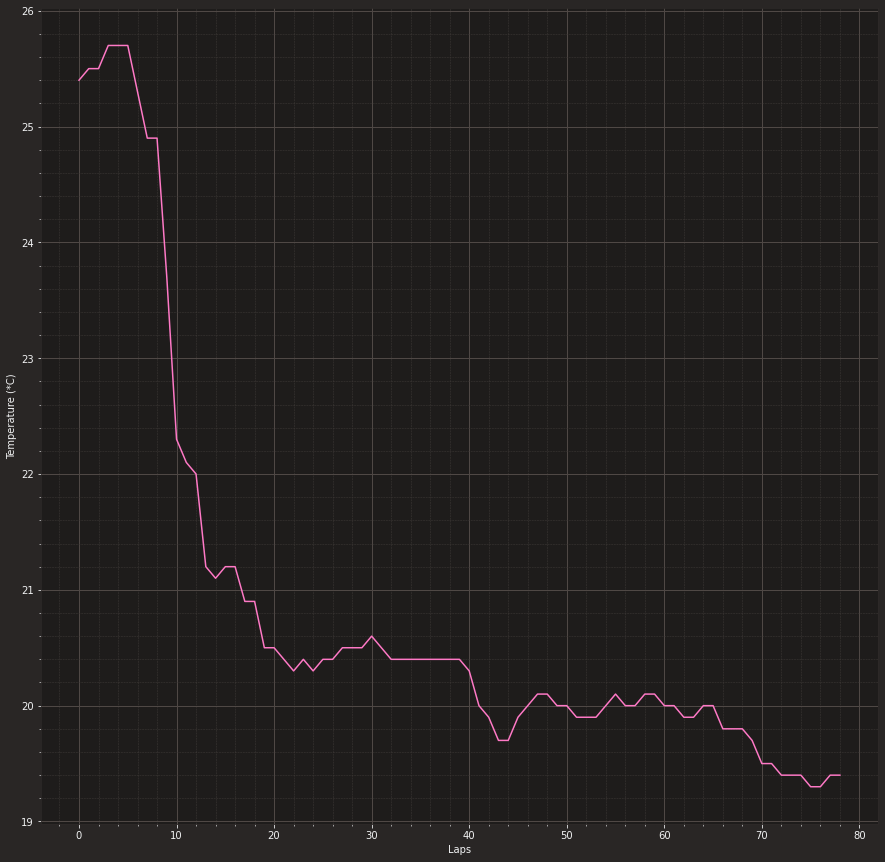

In [44]:
static_track_conditions(quali_silverstone)
static_track_temp(quali_silverstone)

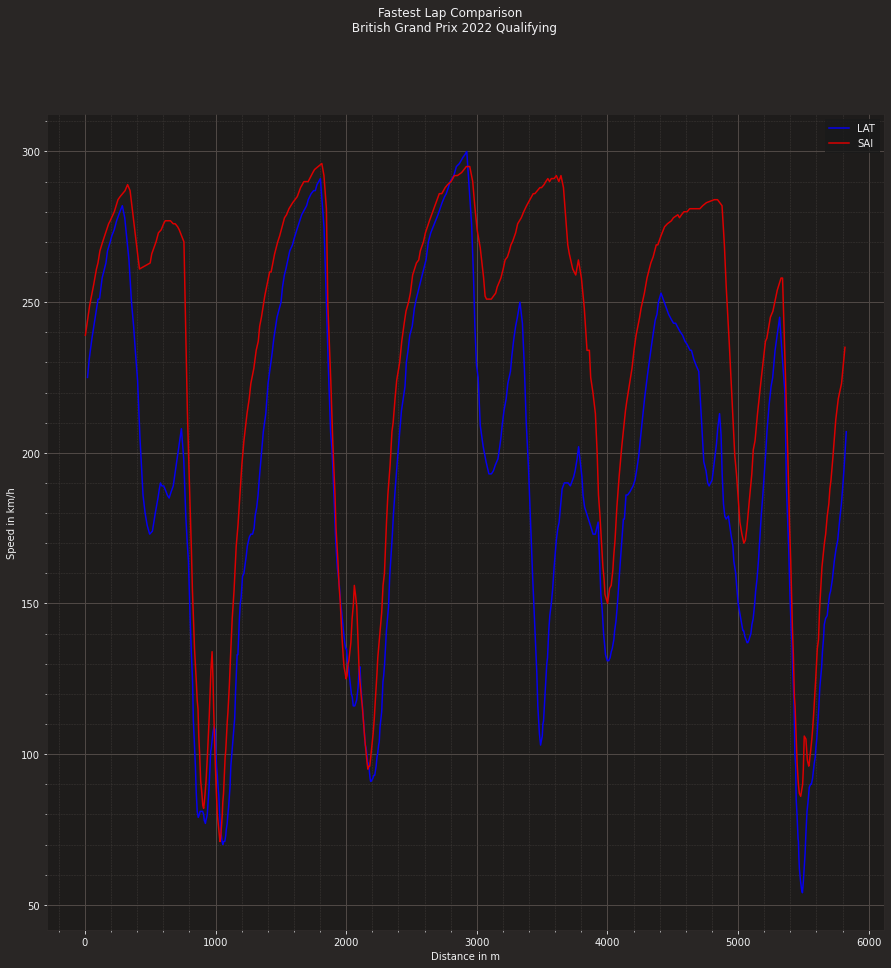

In [45]:
# Just to look at an extreme example we will compare Sainz and Latifi
fastest_lap_comparison("LAT","SAI", quali_silverstone)

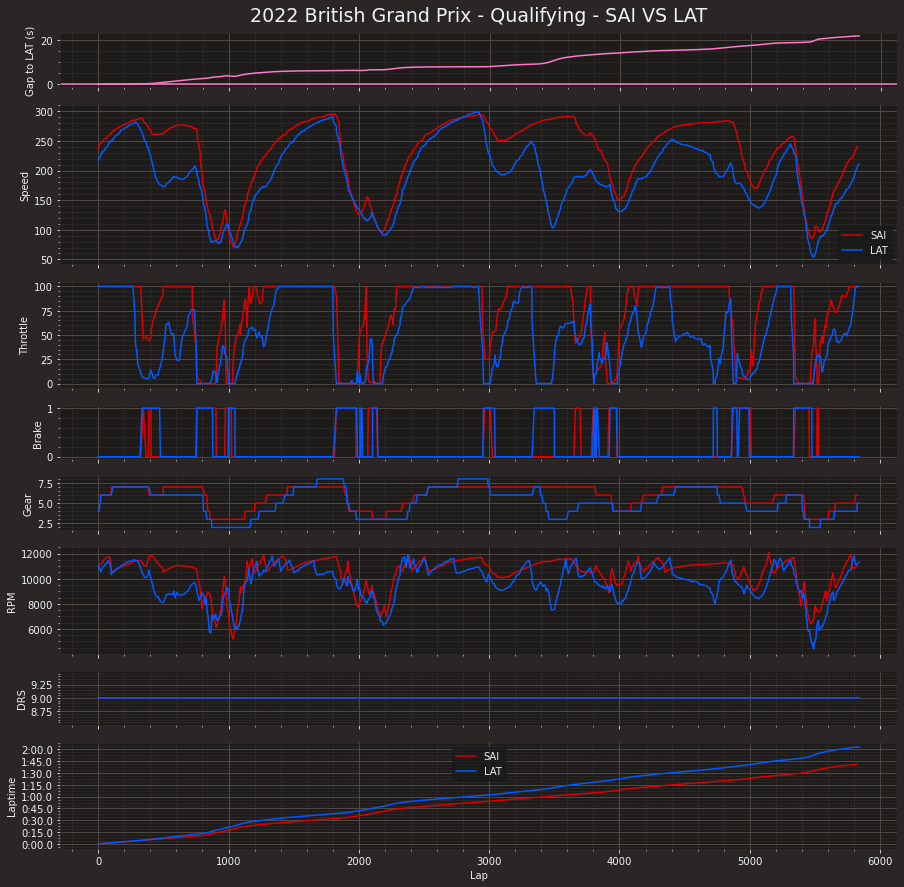

In [46]:
get_driver_lap_comparison("SAI","LAT",quali_silverstone)

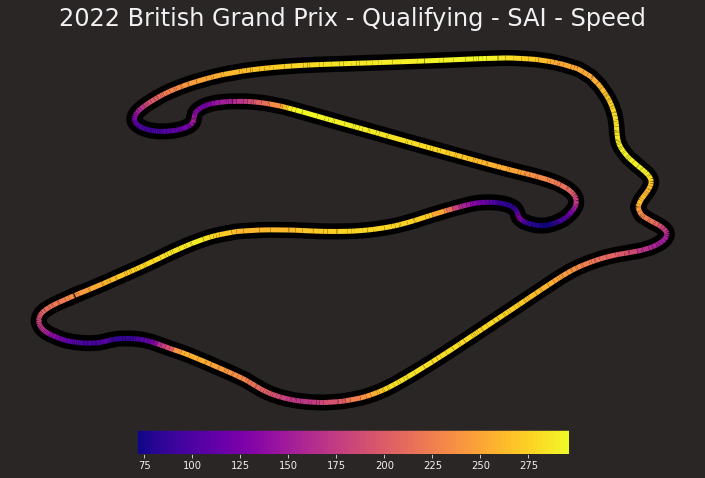

In [47]:
plot_driver_speed_change("SAI", quali_silverstone)

### Race Analysis

In [48]:
#This can be used to get a heatmap representation of the fastest lap for 
# a specified driver. NOTE: However, this does not work after you use the get_aws function
# Can only be used without a legend. more work needed to find out why

'''session = quali_silverstone
driver1= "LEC"
    
colormap = plt.cm.plasma

lap = session.laps.pick_driver(driver1).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

fig.suptitle(f'{session.event.year} {session.event.EventName} - {session.name} - {driver1} - Speed', size=24, y=0.97)


# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
#cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()'''

'session = quali_silverstone\ndriver1= "LEC"\n    \ncolormap = plt.cm.plasma\n\nlap = session.laps.pick_driver(driver1).pick_fastest()\n\n# Get telemetry data\nx = lap.telemetry[\'X\']              # values for x-axis\ny = lap.telemetry[\'Y\']              # values for y-axis\ncolor = lap.telemetry[\'Speed\']      # value to base color gradient on\n\npoints = np.array([x, y]).T.reshape(-1, 1, 2)\nsegments = np.concatenate([points[:-1], points[1:]], axis=1)\n\n    # We create a plot with title and adjust some setting to make it look good.\nfig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))\n\nfig.suptitle(f\'{session.event.year} {session.event.EventName} - {session.name} - {driver1} - Speed\', size=24, y=0.97)\n\n\n# Adjust margins and turn of axis\nplt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)\nax.axis(\'off\')\n\n\n# After this, we plot the data itself.\n# Create background track line\nax.plot(lap.telemetry[\'X\'], lap.telemetry[\'Y\'], color=\'black

In [49]:
race_silverstone = main(2022, "British", "R")

core           INFO 	Loading data for British Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['55', '11', '44', '16', '14', '4', '1', '47', '5', '20', '18', '6', '3', '22', '31', '10', '77', '63', '24', '23']


In [50]:

race_silverstone_df= race_silverstone.laps
race_silverstone_df = race_silverstone_df[race_silverstone_df["LapTime"].notna()]
race_silverstone_df = race_silverstone_df.sort_values(["LapTime"])
race_silverstone_df

Time DriverNumber                LapTime  LapNumber  \
155 0 days 03:20:12.899000           44 0 days 00:01:30.510000       52.0   
43  0 days 03:07:56.039000           55 0 days 00:01:30.813000       44.0   
42  0 days 03:06:25.226000           55 0 days 00:01:30.886000       43.0   
98  0 days 03:12:33.661000           11 0 days 00:01:30.937000       47.0   
100 0 days 03:15:35.954000           11 0 days 00:01:30.997000       49.0   
..                     ...          ...                    ...        ...   
351 0 days 03:00:40.049000            1 0 days 00:02:23.569000       40.0   
403 0 days 03:00:43.703000           47 0 days 00:02:24.596000       40.0   
106 0 days 02:00:27.734000           44 0 days 00:02:25.614000        3.0   
158 0 days 02:00:24.989000           16 0 days 00:02:29.193000        3.0   
54  0 days 02:00:26.523000           11 0 days 00:02:29.321000        3.0   

     Stint             PitOutTime PitInTime            Sector1Time  \
155    4.0                    NaT       NaT 0 days 00:00:29.162000   
43     4.0                    NaT       NaT 0 days 00:00:29.169000   
42     4.0                    NaT       NaT 0 days 00:00:29.125000   
98     4.0                    NaT       NaT 0 days 00:00:29.211000   
100    4.0                    NaT       NaT 0 days 00:00:29.229000   
..     ...                    ...       ...                    ...   
351    5.0 0 days 02:58:39.289000       NaT 0 days 00:00:58.746000   
403    4.0 0 days 02:58:43.985000       NaT 0 days 00:01:00.011000   
106    2.0                    NaT       NaT 0 days 00:01:18.340000   
158    2.0                    NaT       NaT 0 days 00:01:24.124000   
54     2.0                    NaT       NaT 0 days 00:01:22.940000   

               Sector2Time            Sector3Time  ... IsPersonalBest  \
155 0 days 00:00:36.580000 0 days 00:00:24.768000  ...           True   
43  0 days 00:00:36.623000 0 days 00:00:25.021000  ...           True   
42  0 days 00:00:36.805000 0 days 00:00:24.956000  ...          False   
98  0 days 00:00:36.795000 0 days 00:00:24.931000  ...           True   
100 0 days 00:00:36.848000 0 days 00:00:24.920000  ...          False   
..                     ...                    ...  ...            ...   
351 0 days 00:00:51.589000 0 days 00:00:33.234000  ...          False   
403 0 days 00:00:52.208000 0 days 00:00:32.377000  ...          False   
106 0 days 00:00:40.658000 0 days 00:00:26.616000  ...          False   
158 0 days 00:00:39.137000 0 days 00:00:25.932000  ...          False   
54  0 days 00:00:40.060000 0 days 00:00:26.321000  ...          False   

    Compound TyreLife  FreshTyre           LapStartTime             Team  \
155     SOFT     13.0       True 0 days 03:18:42.389000         Mercedes   
43      SOFT      5.0       True 0 days 03:06:25.226000          Ferrari   
42      SOFT      4.0       True 0 days 03:04:54.340000          Ferrari   
98      SOFT      8.0       True 0 days 03:11:02.724000  Red Bull Racing   
100     SOFT     10.0       True 0 days 03:14:04.957000  Red Bull Racing   
..       ...      ...        ...                    ...              ...   
351     SOFT      1.0       True 0 days 02:58:16.480000  Red Bull Racing   
403     SOFT      1.0       True 0 days 02:58:19.107000     Haas F1 Team   
106   MEDIUM      2.0       True 0 days 01:58:02.120000         Mercedes   
158   MEDIUM      2.0       True 0 days 01:57:55.796000          Ferrari   
54    MEDIUM      2.0       True 0 days 01:57:57.202000  Red Bull Racing   

     Driver  TrackStatus IsAccurate            LapStartDate  
155     HAM            1       True 2022-07-03 16:19:42.401  
43      SAI            1       True 2022-07-03 16:07:25.238  
42      SAI            1      False 2022-07-03 16:05:54.352  
98      PER            1       True 2022-07-03 16:12:02.736  
100     PER            1       True 2022-07-03 16:15:04.969  
..      ...          ...        ...                     ...  
351     VER            4      Fa

In [51]:
race_silverstone.results

DriverNumber BroadcastName Abbreviation         TeamName TeamColor  \
55           55       C SAINZ          SAI          Ferrari    ed1c24   
11           11       S PEREZ          PER  Red Bull Racing    1e5bc6   
44           44    L HAMILTON          HAM         Mercedes    6cd3bf   
16           16     C LECLERC          LEC          Ferrari    ed1c24   
14           14      F ALONSO          ALO           Alpine    2293d1   
4             4      L NORRIS          NOR          McLaren    f58020   
1             1  M VERSTAPPEN          VER  Red Bull Racing    1e5bc6   
47           47  M SCHUMACHER          MSC     Haas F1 Team    b6babd   
5             5      S VETTEL          VET     Aston Martin    2d826d   
20           20   K MAGNUSSEN          MAG     Haas F1 Team    b6babd   
18           18      L STROLL          STR     Aston Martin    2d826d   
6             6      N LATIFI          LAT         Williams    37bedd   
3             3   D RICCIARDO          RIC          McLaren    f58020   
22           22     Y TSUNODA          TSU       AlphaTauri    4e7c9b   
31           31        E OCON          OCO           Alpine    2293d1   
10           10       P GASLY          GAS       AlphaTauri    4e7c9b   
77           77      V BOTTAS          BOT       Alfa Romeo    b12039   
63           63     G RUSSELL          RUS         Mercedes    6cd3bf   
24           24        G ZHOU          ZHO       Alfa Romeo    b12039   
23           23       A ALBON          ALB         Williams    37bedd   

    FirstName    LastName          FullName  Position  GridPosition  Q1  Q2  \
55     Carlos       Sainz      Carlos Sainz       1.0           1.0 NaT NaT   
11     Sergio       Perez      Sergio Perez       2.0           4.0 NaT NaT   
44      Lewis    Hamilton    Lewis Hamilton       3.0           5.0 NaT NaT   
16    Charles     Leclerc   Charles Leclerc       4.0           3.0 NaT NaT   
14   Fernando      Alonso   Fernando Alonso       5.0           7.0 NaT NaT   
4       Lando      Norris      Lando Norris       6.0           6.0 NaT NaT   
1         Max  Verstappen    Max Verstappen       7.0           2.0 NaT NaT   
47       Mick  Schumacher   Mick Schumacher       8.0          19.0 NaT NaT   
5   Sebastian      Vettel  Sebastian Vettel       9.0          18.0 NaT NaT   
20      Kevin   Magnussen   Kevin Magnussen      10.0          17.0 NaT NaT   
18      Lance      Stroll      Lance Stroll      11.0          20.0 NaT NaT   
6    Nicholas      Latifi   Nicholas Latifi      12.0          10.0 NaT NaT   
3      Daniel   Ricciardo  Daniel Ricciardo      13.0          14.0 NaT NaT   
22       Yuki     Tsunoda      Yuki Tsunoda      14.0          13.0 NaT NaT   
31    Esteban        Ocon      Esteban Ocon      15.0          15.0 NaT NaT   
10     Pierre       Gasly      Pierre Gasly      16.0          11.0 NaT NaT   
77   Valtteri      Bottas   Valtteri Bottas      17.0          12.0 NaT NaT   
63     George     Russell    George Russell      18.0           8.0 NaT NaT   
24     Guanyu        Zhou       Guanyu Zhou      19.0           9.0 NaT NaT   
23  Alexander       Albon   Alexander Albon      20.0          16.0 NaT NaT   

    Q3                   Time            Status  Points  
55 NaT 0 days 02:17:50.311000          Finished    25.0  
11 NaT 0 days 02:17:54.090000          Finished    18.0  
44 NaT 0 days 02:17:56.536000          Finished    16.0  
16 NaT 0 days 02:17:58.857000          Finished    12.0  
14 NaT 0 days 02:17:59.882000          Finished    10.0  
4  NaT 0 days 02:18:02.254000          Finished     8.0  
1  NaT 0 days 02:18:09.088000          Finished     6.0  
47 NaT 0 days 02:18:09.306000          Finished     4.0  
5  NaT 0 days 02:18:12.667000          Finished     2.0  
20 NaT 0 days 02:18:14.901000          Finished     1.0  
18 NaT 0 days 02:18:16.458000          Finished     0.0  
6  NaT 0 days 02:18:22.822000          Finished     0.0  
3  NaT 0 days 02:18:23.128000          Finished     0.0

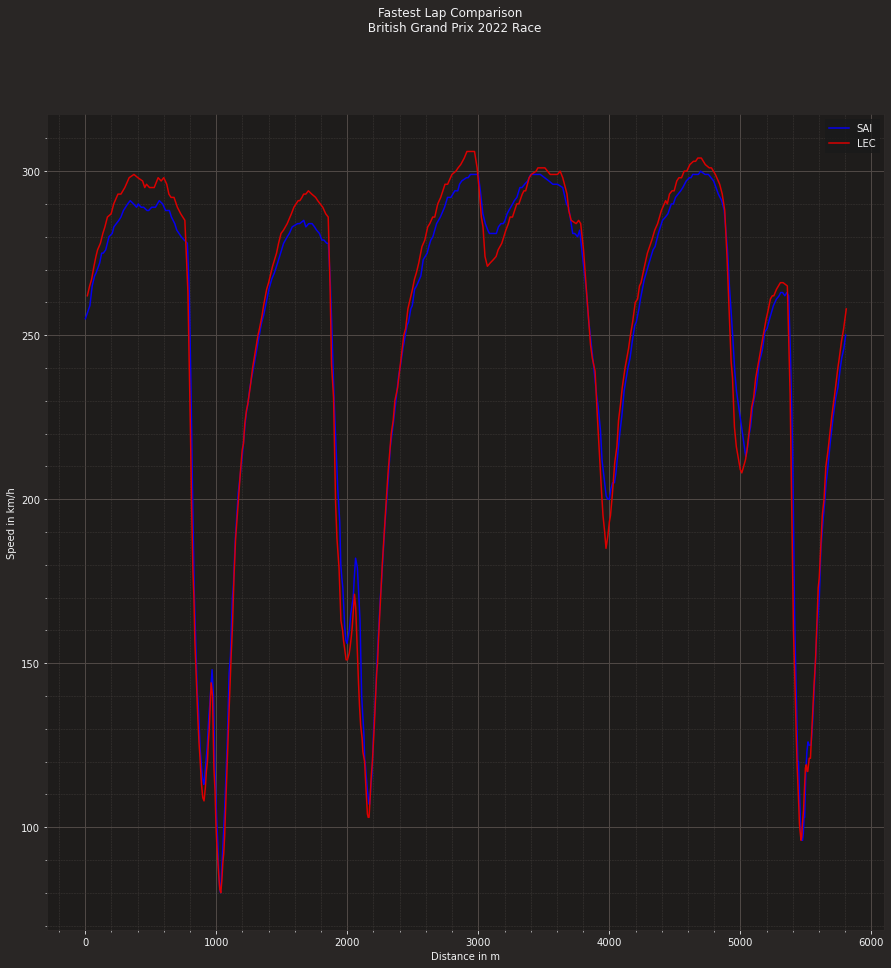

In [52]:
fastest_lap_comparison("SAI","LEC",race_silverstone)

Same Team Color


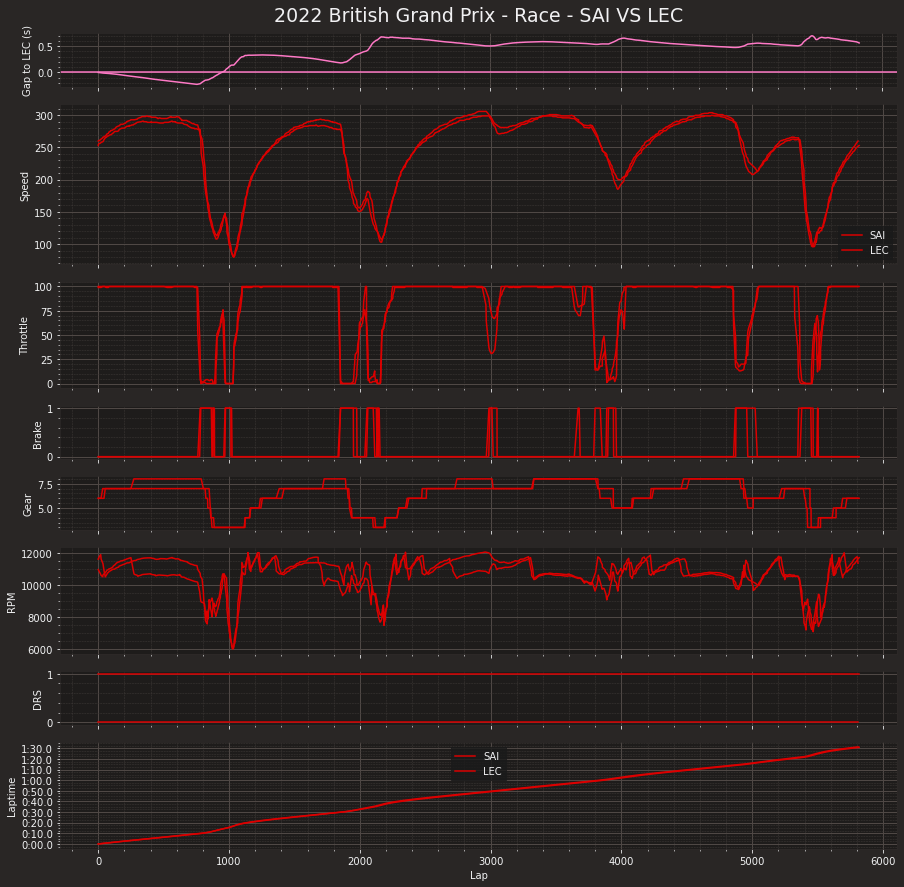

In [53]:
get_driver_lap_comparison("SAI","LEC", race_silverstone)

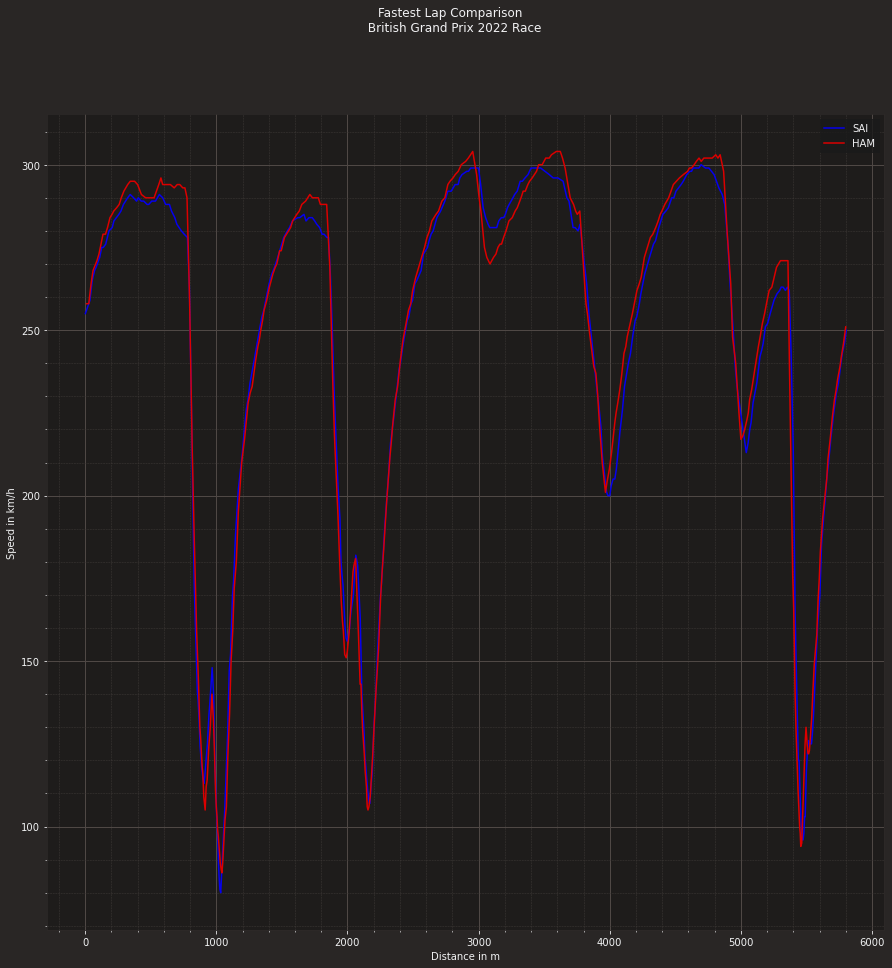

In [54]:
fastest_lap_comparison("SAI", "HAM", race_silverstone)

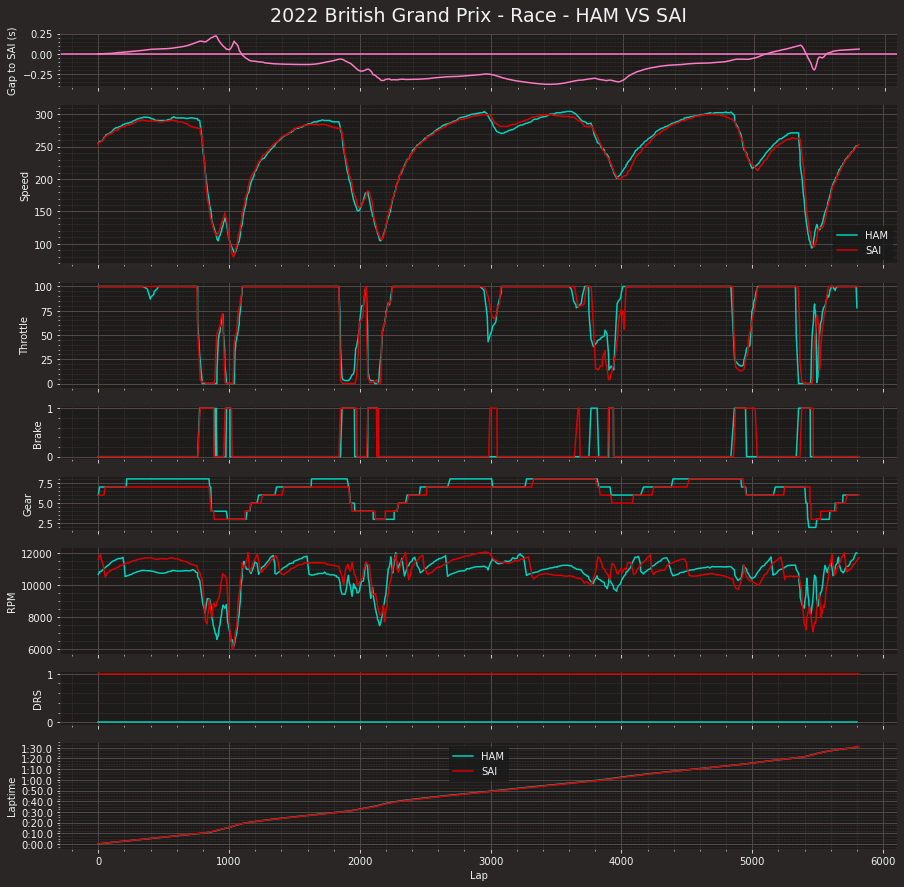

In [55]:
get_driver_lap_comparison("HAM","SAI", race_silverstone)

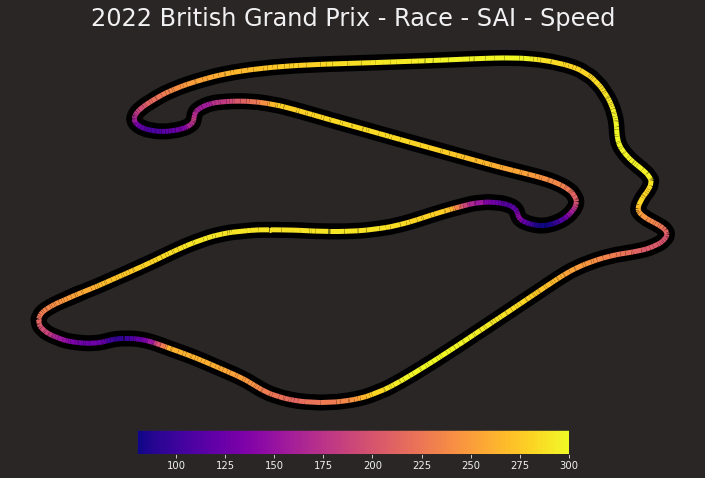

In [56]:
plot_driver_speed_change("SAI",race_silverstone)

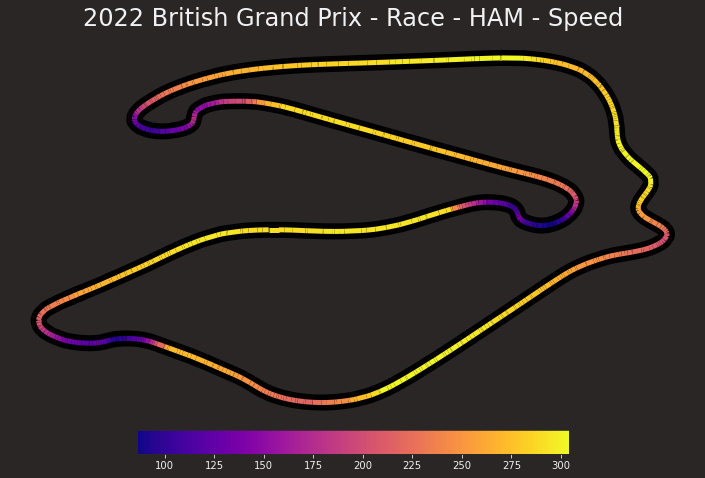

In [57]:
plot_driver_speed_change("HAM", race_silverstone)

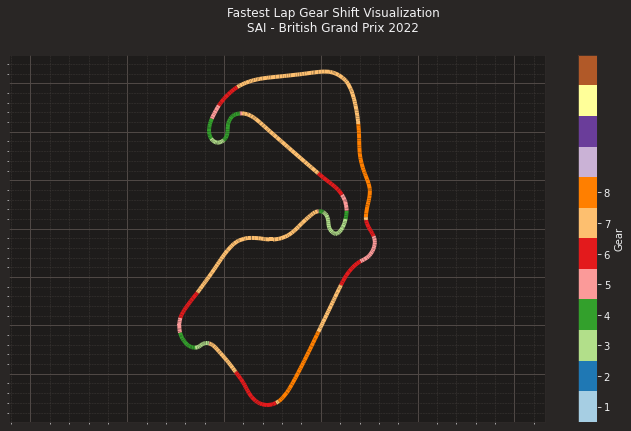

In [58]:
driver_gear_changes("SAI", race_silverstone)

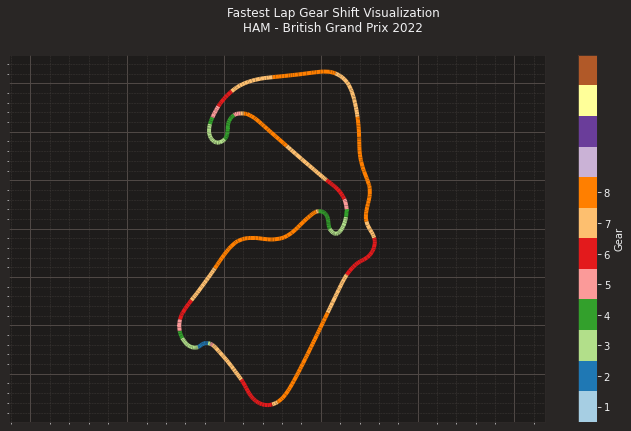

In [59]:
driver_gear_changes("HAM", race_silverstone)

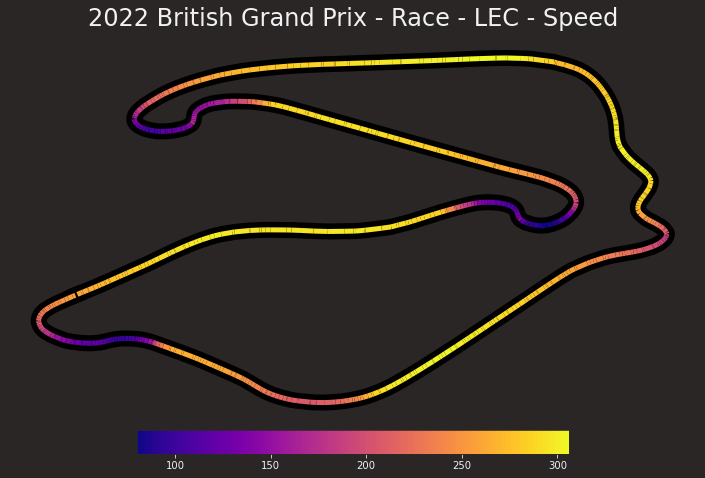

In [60]:
plot_driver_speed_change("LEC", race_silverstone)

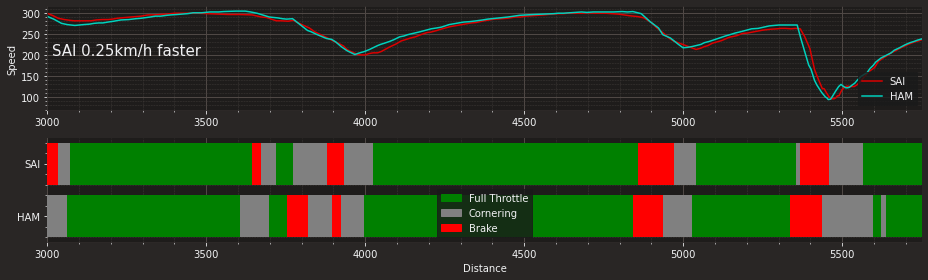

In [61]:
get_driver_aws_data("SAI","HAM",3000,5750, race_silverstone)

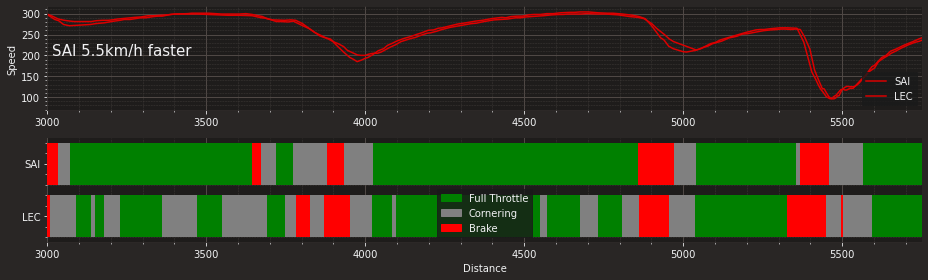

In [62]:
get_driver_aws_data("SAI","LEC",3000,5750, race_silverstone)

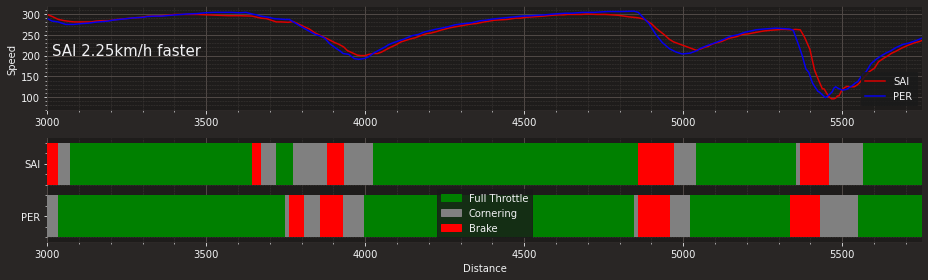

In [63]:
get_driver_aws_data("SAI","PER",3000,5750, race_silverstone)

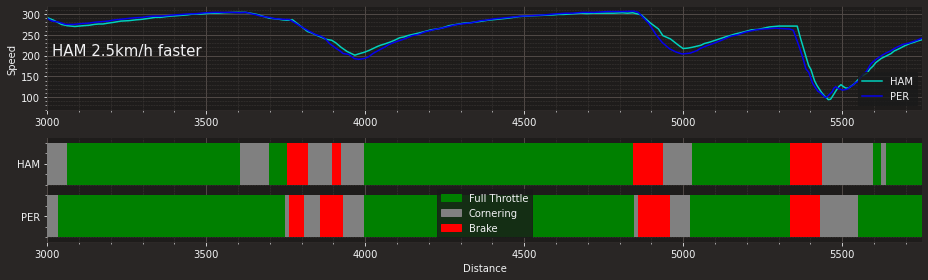

In [64]:
get_driver_aws_data("HAM","PER",3000,5750, race_silverstone)